# NOTEBOOK GRUPO 11 ESTADISTICA COMPUTACIONAL



## Introducción

Para el desarrollo del proyecto seleccionamos el dataset “Student Habits vs Academic Performance”. Este conjunto de datos contiene aproximadamente 1 000 observaciones sobre estudiantes, incluyendo información relacionada con sus hábitos diarios (horas de estudio, tiempo en redes sociales, calidad del sueño, nivel de estrés, actividad física, entre otros) junto con su puntaje final de examen.

La elección de este dataset se fundamenta en su relevancia académica y social, ya que permite analizar cómo distintos factores de comportamiento y estilo de vida influyen en el rendimiento académico. Este tipo de estudio resulta de gran interés en ámbitos como la educación, la psicología y la salud pública, y ofrece la posibilidad de identificar patrones que podrían servir de base para recomendaciones prácticas a estudiantes y docentes.

### Inicialización

In [ ]:
!pip install seaborn
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student_habits_performance.csv')
print("Pandas funciona versión:", pd.__version__)

Pandas funciona versión: 2.2.2


## PRIMERA ENTREGA

### Sobre los datos y nuestra motivación
El dataset *"Strudent Habits vs Academic Performance"*, es una simulación de datos basados en comportamiento realista en estudiantes *college*.  
Estos datos toman una colección de comportamientos de la rutina diaria y las notas de los estudiantes.  
Como grupo estamos interesados en buscar alguna correlación entre estos hábitos y las calificaciones ya que podrían indicar correlaciones que podrían ser interesantes de investigar.  
**Variables:**  
    **- Edad:** Edad del estudiante.  
    **- Género:** Genero del estudiante.  
    **- Horas de estudio:** Horas que el estudiante dedica a estudiar diariamente.  
    **- Redes Sociales:** Horas diarias de uso de redes sociales.  
    **- Netflix:** Horas diarias de visualización de netflix.  
    **- Trabajo a medio tiempo:** Si/No tiene un trabajo a medio tiempo.  
    **- Asistencia:** Porcentaje de asistencia a clases.  
    **- Horas de sueño:** Horas de sueño diarias.  
    **- Dieta:** Good/Fair/Poor, indica la calidad de su dieta alimenticia.  
    **- Frecuecia de ejercicio:** Cantidad de veces por semana que la persona realiza actividad física..  
    **- Educación de los padres:** Nivel más alto de educación alcanzado por los padres.  
    **- Internet:** Good/Average/Poor Calidad del internet.  
    **- Salud Mental:** Evaluación, del 1 al 10, de su salud mental.  
    **- Extracurricular:** Si/No participa en actividades extracurriculares.  
    **- Nota:** Nota de su exámen.

### LIMPIEZA DE DATOS
El dataset elegido cuenta con 1000 observaciones y 16 columnas.  
Analizamos el dataset en busca de datos nulos, se eliminaran las observaciones que tengan datos nulos en algunas de sus columnas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Podemos notar que en la columna ***parental_education_level*** existen 91 observaciones que tienen ese campo nulo.  
Eliminamos las observaciones nulas con `df.dropna()`

In [ ]:
df = df.dropna()
print("Filas:",df.shape[0])
print("Columnas:",df.shape[1])
print("\nEsta es una muestra de como se ven los datos:")
df.head()

Filas: 909
Columnas: 16

Esta es una muestra de como se ven los datos:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Descripición de las variables y los datos
Primero crearemos un diccionario para poder identificar los tipos de variables que trabajaremos. El diccionario guardará como key el nombre de la columna y como valor el tipo de dato de la variable, las que podrán ser:  
* Categóricas
* Discretas
* Continuas  

También crearemos una lista por cada tipo de variable.

In [ ]:
dict_TipoVariable={}
varCategoricas=[]
varDiscretas=[]
varContinuas=[]
for columna, tipo in df.dtypes.items():
    if (tipo=="object"):
        dict_TipoVariable[columna]="Categorica"
        varCategoricas.append(columna)
    elif(tipo=="int64"):
        dict_TipoVariable[columna]="Discreta"
        varDiscretas.append(columna)
    else:
        dict_TipoVariable[columna]="Continua"
        varContinuas.append(columna)

print("Variables categóricas: ",varCategoricas)
print("Variables continuas: ",varContinuas)
print("Variables discretas:", varDiscretas)

Variables categóricas:  ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Variables continuas:  ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']
Variables discretas: ['age', 'exercise_frequency', 'mental_health_rating']


### Estadísticos


#### min, max, promedio y correlacion
Calculamos el mínimo, máximo y promedio de cada variable numérica existente en nuestro dataset.  
En la celda subsiguiente calculamos la correlación entre las variables. Los datos de la correlación varían entre -1 y 1.  
* Valores cercanos a 1 en la correlación indican que existe una tendencia directamente proporcional entre los datos.  
* Valores cercanos a -1 indican la existencia de una tendencia inversamente proporcional entre los datos.
* Valores cercanos a 0 indican que los datos no tienen implicancia entre sí.

In [ ]:
varNumericas = varContinuas+varDiscretas
df[varNumericas].agg(["min","max","mean"]).T


,min,max,mean
study_hours_per_day,0.0,8.3,3.538724
social_media_hours,0.0,7.2,2.504620
netflix_hours,0.0,5.4,1.830363
attendance_percentage,56.0,100.0,83.880308
sleep_hours,3.2,10.0,6.474037
exam_score,18.4,100.0,69.558196
age,17.0,24.0,20.475248
exercise_frequency,0.0,6.0,3.051705
mental_health_rating,1.0,10.0,5.466447


In [ ]:
df[varNumericas].corr()

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exam_score,age,exercise_frequency,mental_health_rating
study_hours_per_day,1.000000,0.007364,-0.014493,0.028967,-0.026241,0.822950,0.007150,-0.024708,-0.015896
social_media_hours,0.007364,1.000000,0.011865,0.049356,0.026861,-0.171672,-0.023854,-0.023975,-0.000417
netflix_hours,-0.014493,0.011865,1.000000,-0.015008,-0.017006,-0.166578,0.005841,-0.004155,-0.016612
attendance_percentage,0.028967,0.049356,-0.015008,1.000000,0.001972,0.096005,-0.030203,-0.010563,-0.017096
sleep_hours,-0.026241,0.026861,-0.017006,0.001972,1.000000,0.122294,0.040498,0.030013,-0.010653
exam_score,0.822950,-0.171672,-0.166578,0.096005,0.122294,1.000000,-0.012833,0.161397,0.317945
age,0.007150,-0.023854,0.005841,-0.030203,0.040498,-0.012833,1.000000,-0.005718,-0.052137
exercise_frequency,-0.024708,-0.023975,-0.004155,-0.010563,0.030013,0.161397,-0.005718,1.000000,-0.001500
mental_health_rating,-0.015896,-0.000417,-0.016612,-0.017096,-0.010653,0.317945,-0.052137,-0.001500,1.000000


#### Outliers
Obtenemos las anomalías y las agregamos a un diccionario que contiene la cantidad de outliers por cada variable.  
En la siguiente celda obtenemos la fila y el valor del outlier respectivamente.
En la celda subsiguiente recorremos el diccionario de outliers.

In [ ]:
outliers_dict = {}

for columna in varNumericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3-Q1

    outliers=df[(df[columna]<Q1-IQR*1.5) | (df[columna]>Q3+IQR*1.5)][columna]
    outliers_dict[columna]=outliers
    print(columna, "tiene los siguientes outliers: ")
    print(outliers, "\n")



study_hours_per_day tiene los siguientes outliers: 
455    8.3
797    8.2
875    7.6
Name: study_hours_per_day, dtype: float64 

social_media_hours tiene los siguientes outliers: 
346    6.0
361    6.1
641    5.7
735    7.2
Name: social_media_hours, dtype: float64 

netflix_hours tiene los siguientes outliers: 
556    5.4
822    5.3
Name: netflix_hours, dtype: float64 

attendance_percentage tiene los siguientes outliers: 
651    57.6
706    56.7
971    56.0
Name: attendance_percentage, dtype: float64 

sleep_hours tiene los siguientes outliers: 
955    10.0
Name: sleep_hours, dtype: float64 

exam_score tiene los siguientes outliers: 
265    18.4
327    23.1
Name: exam_score, dtype: float64 

age tiene los siguientes outliers: 
Series([], Name: age, dtype: int64) 

exercise_frequency tiene los siguientes outliers: 
Series([], Name: exercise_frequency, dtype: int64) 

mental_health_rating tiene los siguientes outliers: 
Series([], Name: mental_health_rating, dtype: int64) 



In [ ]:
for columna in outliers_dict:
    print(f"{columna} tiene {len(outliers_dict[columna])} outliers")

study_hours_per_day tiene 3 outliers
social_media_hours tiene 4 outliers
netflix_hours tiene 2 outliers
attendance_percentage tiene 3 outliers
sleep_hours tiene 1 outliers
exam_score tiene 2 outliers
age tiene 0 outliers
exercise_frequency tiene 0 outliers
mental_health_rating tiene 0 outliers


#### Variables categóricas

Dentro de nuestras variables categóricas la más llamativa es ***gender***. Esta columna principal nos permite visualizar de una mejor manera la muestra obtenida y poder hacer un estudio bastante amplio.  
Estudiaremos el dataset bajo esta variable categórica en las siguientes celdas.

In [ ]:
print("Datos a considerar de las variables categoricas:")
df.describe(include=["object"])


Datos a considerar de las variables categoricas:


,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1999,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


##### Análisis de datos en base al género

In [ ]:
df["gender"].value_counts()


,count
gender,
Male,440
Female,433
Other,36


In [ ]:
pd.crosstab(df["gender"], df["age"])

age,17,18,19,20,21,22,23,24
gender,,,,,,,,
Female,53,53,53,70,59,55,42,48
Male,64,52,46,60,49,45,56,68
Other,4,4,2,7,6,2,6,5


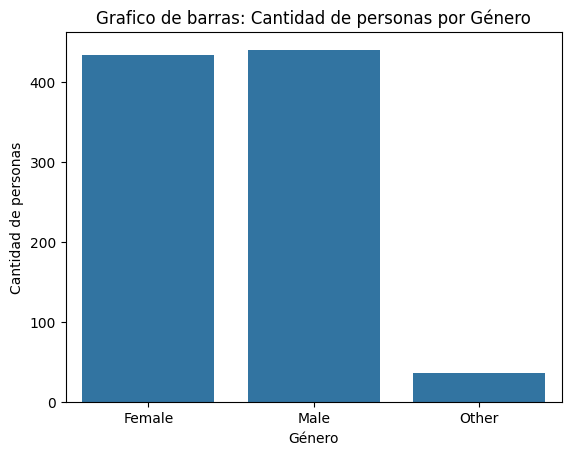

In [ ]:
sns.countplot(x="gender", data=df)
plt.title("Grafico de barras: Cantidad de personas por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de personas")
plt.show()

In [ ]:
df.groupby("gender")["exam_score"].agg(["min", "max", "mean"])

,min,max,mean
gender,,,
Female,18.4,100.0,69.978522
Male,23.1,100.0,68.970227
Other,43.9,100.0,71.688889


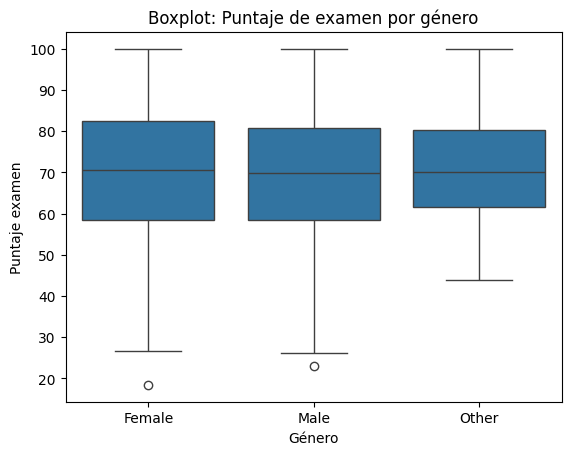

In [ ]:
sns.boxplot(data=df, x="gender", y="exam_score")
plt.title("Boxplot: Puntaje de examen por género")
plt.ylabel("Puntaje examen")
plt.xlabel("Género")
plt.show()

In [ ]:
df.groupby("gender")["study_hours_per_day"].agg(["min", "max", "mean"])

,min,max,mean
gender,,,
Female,0.0,7.6,3.591917
Male,0.0,8.3,3.472727
Other,1.5,5.6,3.705556


En este apartado podemos notar que los datos están bastante equilibrados, tanto en edad como género. Además, las notas no difieren por mucho entre hombres y mujeres (1 punto), mostrando que no hay una tendencia que se pueda observar de manera evidente.

#### Visualización de datos y relaciones

##### Puntajes examen y horas de estudio


En las siguientes casillas presentamos dos gráficos que relacionan las horas de estudio con el puntaje obtenido en el examen.

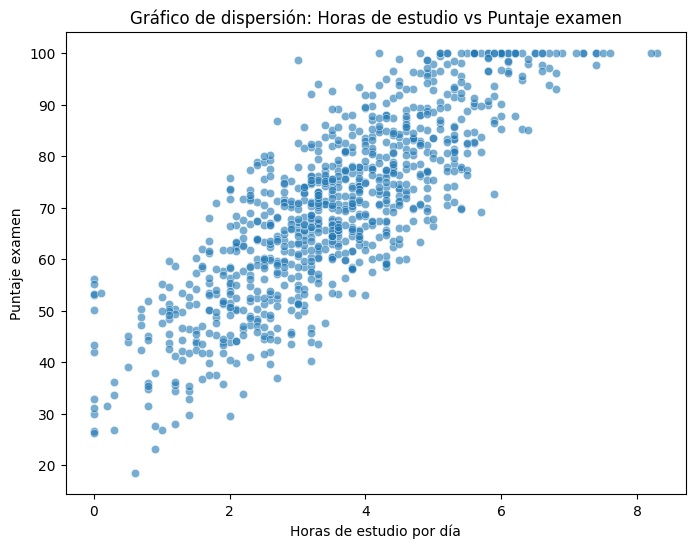

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="study_hours_per_day", y="exam_score", alpha=0.6)
plt.title("Gráfico de dispersión: Horas de estudio vs Puntaje examen")
plt.ylabel("Puntaje examen")
plt.xlabel("Horas de estudio por día")
plt.show()

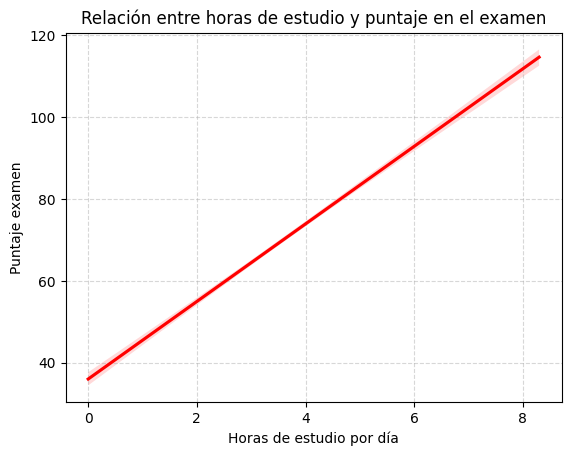

In [ ]:
sns.regplot(data=df, x="study_hours_per_day", y="exam_score", scatter=False, color="red")

plt.title("Relación entre horas de estudio y puntaje en el examen", fontsize=12)
plt.xlabel("Horas de estudio por día")
plt.ylabel("Puntaje examen")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Cómo era de esperarse, hay una relación directa entre estudio y notas. Si bien en el primer gráfico se ve una dispersión importante, hay una clara tendencia a que mayor estudio significa un mejor rendimiento en sus examenes. Por otro lado, el grupo de la muestra con horas de estudio sobre 6 horas es pequeña pero se puede observar que todos los estudiantes pertenecientes a este grupo tienen notas sobresalientes.  
Cómo conclusión inicial, sin mayor análisis, podríamos suponer que lo ideal es estudiar entre 4 y 6 horas, siendo 6 horas donde maximizas la nota.

##### Puntaje de examen y salud mental



La salud mental es un tópico con mucha fuerza en el día de hoy, el impacto estrés y la ansiedad es algo real que debe ser analizado.

Se modela un Diagrama de cajas para ver el rendimiento de los estudiantes basados en su salud mental.

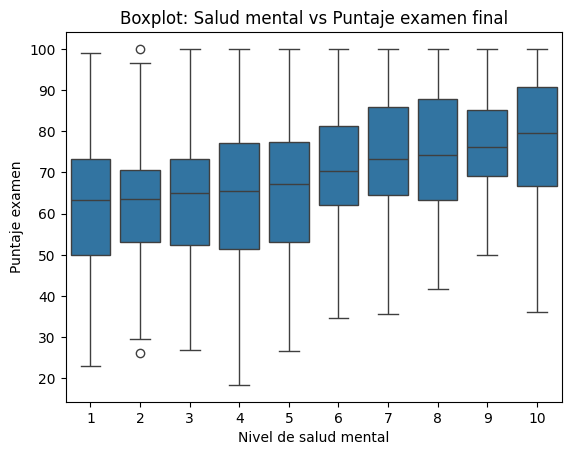

In [ ]:
sns.boxplot(data=df, x="mental_health_rating", y="exam_score")
plt.title("Boxplot: Salud mental vs Puntaje examen final")
plt.xlabel("Nivel de salud mental")
plt.ylabel("Puntaje examen")
plt.show()

En el siguiente gráfico se analiza la relación entre salud mental y nota. Se ve una tendencia creciente, donde a mejor salud mental mejor rendimiento académico.  
Si bien no hay una tendencia muy empinada, se ve un impacto de la salud mental.

##### Datos agrupados

Los siguientes dos gráficos son datos agrupados, para poder analizarlos se tuvieron que crear nuevas columnas que presentaran los datos dispuestos en intervalos.  
Las nuevas columnas reciben el nombre de ***social_media_group*** y ***study_hours_group***.


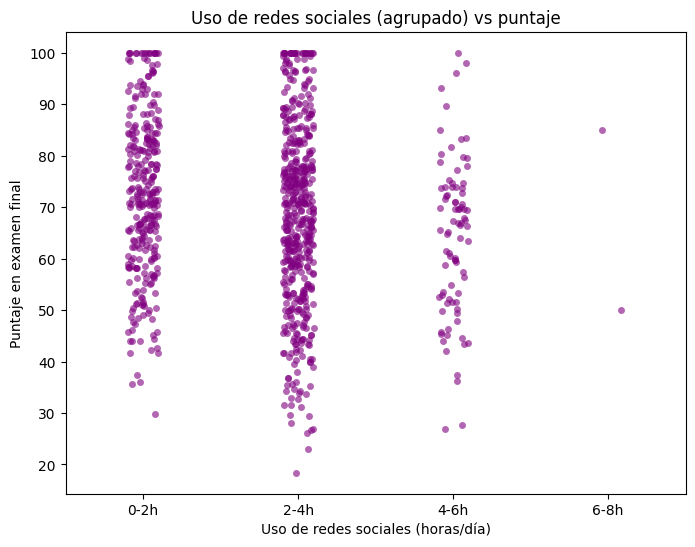

In [ ]:
df["social_media_group"] = pd.cut(df["social_media_hours"], bins=[0,2,4,6,8], labels=["0-2h","2-4h","4-6h","6-8h"]) #Se crea la columna con datos agrupados

plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="social_media_group", y="exam_score",
              jitter=True, alpha=0.6, color="purple")

plt.title("Uso de redes sociales (agrupado) vs puntaje")
plt.xlabel("Uso de redes sociales (horas/día)")
plt.ylabel("Puntaje en examen final")

plt.show()

En el siguiente gráfico se visualizan las horas de uso de redes sociales de forma agrupada (en rangos de dos horas) vs las notas de examen. Se puede visualizar que el grupo con mayor concentración de datos es donde el uso de redes sociales es entre 2 a 4 horas, y se visualiza que la mayor concentración de este grupo está entre 60-80.

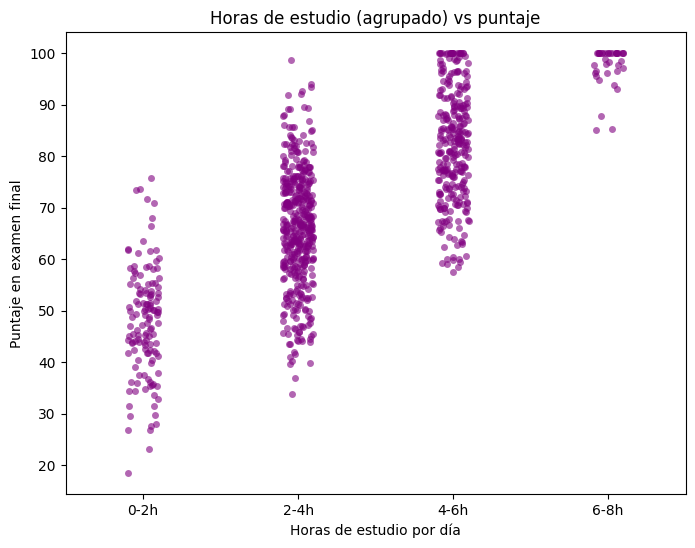

In [ ]:
df["study_hours_group"] = pd.cut(df["study_hours_per_day"], bins=[0,2,4,6,8], labels=["0-2h","2-4h","4-6h","6-8h"]) #Se crea la columna con datos agrupados
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="study_hours_group", y="exam_score",
              jitter=True, alpha=0.6, color="purple")

plt.title("Horas de estudio (agrupado) vs puntaje")
plt.xlabel("Horas de estudio por día")
plt.ylabel("Puntaje en examen final")

plt.show()

Por último, podemos observar la tendencia entre horas de estudio y puntaje. Se puede observar que hay una minoría que estudia sobre 6 horas, teniendo todos notas sobre 80. Por otra parte pareciera que la diferencia entre el mínimo y el máximo entre los otros grupos se mantiene regular, dando a entender un rango de mejoría de nota según las horas estudiadas.

In [ ]:
df.shape #Primer valor corresponde al número de observaciones
         #Segundo valor corresponde a las columnas

(909, 18)

### HIPOTESIS

*“El rendimiento académico se maximiza cuando existe un equilibrio entre horas de estudio, sueño, salud mental y otros factores, siendo el estudio el factor más determinante.”*

***
***Motivación:***

En la literatura educativa suele asumirse que más horas de estudio = mejor rendimiento académico, pero la realidad muestra que esto no siempre es lineal.

Factores como calidad del sueño, salud mental y balance con el ocio podrían influir en cómo se traducen esas horas de estudio en resultados reales.

Un estudiante que estudia mucho pero duerme poco, o tiene altos niveles de estrés, podría rendir peor que otro con menos estudio pero más equilibrio.

Analizar este fenómeno con datos permite cuantificar qué tanto pesa cada factor y comprobar si efectivamente “solo estudiar más” garantiza mejores resultados.